<a href="https://colab.research.google.com/github/20104047TranThiMyNgoc/AI-Subject/blob/main/ND_NGUOI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/dulieu/face 

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/dulieu/face'
/content


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/nhan dien mat/train',target_size=(200,200), batch_size=32, class_mode='categorical')

Found 114 images belonging to 3 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dulieu/face /validation',target_size=(200,200), batch_size=32, class_mode='categorical')

Found 139 images belonging to 3 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

NameError: ignored

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Mi': 0, 'Trương Quốc Hậu': 1, 'ngoc': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(200,200,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

In [ ]:
# Lưu lại
model.save("nhan_dien_khuon_mat.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('nhan_dien_khuon_mat.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose = 0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.024471430107951164
Train Accuracy 0.9912280440330505


<function matplotlib.pyplot.show(*args, **kw)>

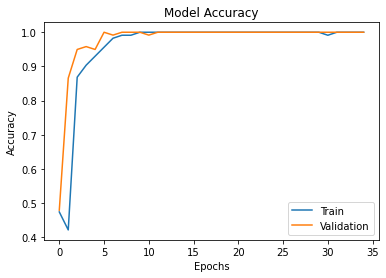

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FB6830CDD10>
1/1 [==============================] - 0s 98ms/step
Đây là: Hau
Chu thich: Du lieu nam trong Test1


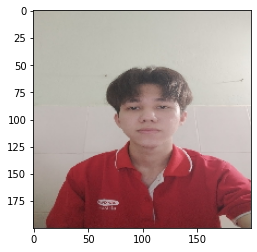

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FB681DE39D0>
1/1 [==============================] - 0s 94ms/step
Đây là: Mi
Chu thich: Du lieu nam trong Test1


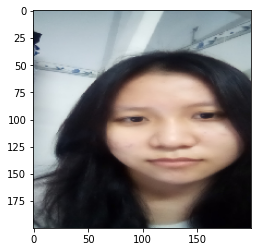

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FB681EBCB10>
1/1 [==============================] - 0s 222ms/step
Đây là: Ngoc
Chu thich: Du lieu nam trong Test1


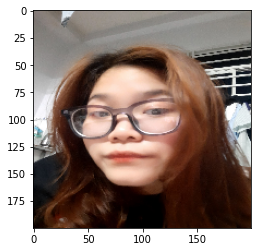

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FB681E271D0>
1/1 [==============================] - 0s 153ms/step
Đây là: Hau
Chu thich: Du lieu nam trong Test2


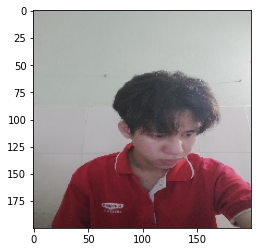

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FB681D327D0>
1/1 [==============================] - 0s 93ms/step
Đây là: Mi
Chu thich: Du lieu nam trong Test2


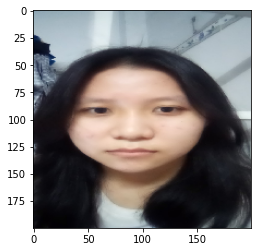

In [ ]:
test1="/content/drive/MyDrive/Colab Notebooks/BT/nhan dien mat/Test/test 1"
test2="/content/drive/MyDrive/Colab Notebooks/BT/nhan dien mat/Test/test 2"
test = [test1, test2]
stt = 0
for j in test:
  stt += 1
  for i in os.listdir(j):
    img=load_img(j+'/'+i,target_size=(200,200))
    print(img)
    plt.imshow(img)
    img=img_to_array(img)
    img=img.astype('float32')
    img=img/255
    img=np.expand_dims(img,axis=0)
    result=model_CNN.predict(img)
    if round(result[0][0])==1:
      prediction='Mi'
    if round(result[0][1])==1:
      prediction='Hau'
    if round(result[0][2])==1:
      prediction='Ngoc'
    print('Đây là:',prediction)
    print(f'Chu thich: Du lieu nam trong Test{stt}')
    plt.show()